In [1]:
#Libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
import numpy as np

In [3]:
df_name = "eval_numba_new" #Name of df to evaluate
df = pd.read_pickle("eval/{}_result.pkl".format(df_name))
df.tail(20)

,stencil_name,backend,numba_parallel,numba_cudadevice,gt4py_backend,nx,ny,nz,num_iter,time_total,run_avg,run_stdev,run_first10,run_last10
597,lapoflap1d,numba_stencil,False,False,numpy,1024,1024,1024,21,102.647493,5.132375,0.007693,5.131925,5.132505
598,lapoflap1d,numba_loop,True,False,numpy,1024,1024,1024,21,31.247566,1.562378,0.022848,1.566774,1.558606
599,lapoflap1d,numba_stencil,True,False,numpy,1024,1024,1024,21,30.597903,1.529895,0.014657,1.529280,1.530477
600,lapoflap1d,numba_vector_function,True,False,numpy,1024,1024,1024,21,30.863368,1.543168,0.020324,1.545610,1.540156
601,lapoflap2d,numpy,False,False,numpy,1024,1024,1024,21,464.341632,23.217082,0.011692,23.215558,23.215939
602,lapoflap2d,numba_vector_function,False,False,numpy,1024,1024,1024,21,580.430852,29.021543,0.020991,29.034505,29.009965
603,lapoflap2d,numba_vector_decorator,False,False,numpy,1024,1024,1024,21,579.185209,28.959260,0.015002,28.954332,28.963769
604,lapoflap2d,numba_loop,False,False,numpy,1024,1024,1024,21,116.522216,5.826111,0.009944,5.825184,5.822863
605,lapoflap2d,numba_stencil,False,False,numpy,1024,1024,1024,21,118.378321,5.918916,0.013038,5.921053,5.916651
606,lapoflap2d,numba_loop,True,False,numpy,1024,1024,1024,21,31.352557,1.567628,0.030568,1.563155,1.572261


In [6]:
#Name Lists
stencil_name_list = [
        
        "laplacian1d", 
        "laplacian2d",
        "laplacian3d",
        "FMA",
       "lapoflap1d",
        "lapoflap2d",
        "lapoflap3d",
    ]

backend_list = ["numpy", 
                "numba_vector_function", 
                "numba_vector_decorator", 
                "numba_loop", 
                "numba_stencil", 
                "numba_cuda"]

numba_parallel = [True,False]

numba_cudadevice = [True,False]








In [7]:
df_color=pd.DataFrame({'laplacian1d': "#F5A802",'laplacian2d': "#598500", 'laplacian3d': "#8D02CC", 'FMA':"#DE2509",'lapoflap1d':"#A87402",'lapoflap2d':"#1D3800",'lapoflap3d':"#450099"},index=[0])

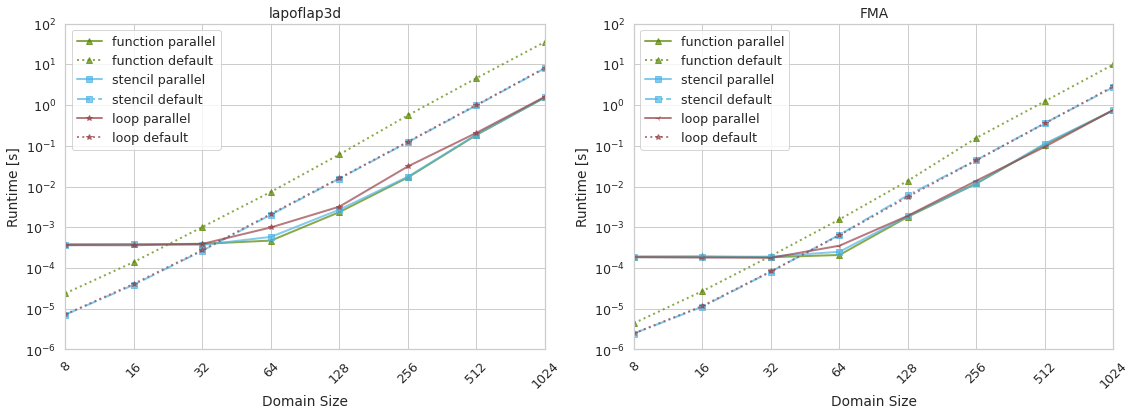

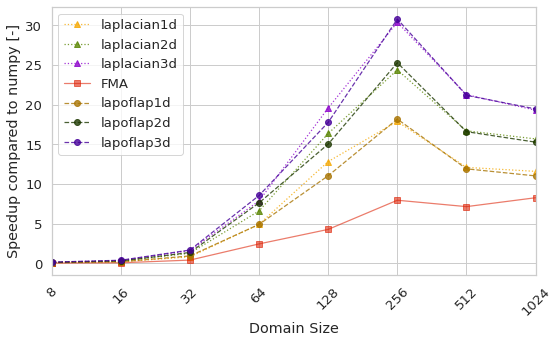

In [8]:
f = plt.figure(figsize=(16, 6))
gs = f.add_gridspec(1, 2)

sns.set_context("notebook", font_scale=1.15, rc={"lines.linewidth": 2})
    
with sns.axes_style("whitegrid"):
        
        ax = f.add_subplot(gs[0, 0])    
        for stencil in ['lapoflap3d']:
                #sns.set_context("talk")
                #sns.set()
                #plt.figure(figsize=(10,5))
                #plt.title(stencil)
                plt.yscale("log")
                xs=[0,1,2,3,4,5,6,7]
                plt.xticks(xs,(8,16,32,64,128,256,512,1024))
                plt.xticks(rotation=45)
                plt.xlim((0,7))
                plt.ylim((1e-6,1e2))

                #df_numpy = df[((df.stencil_name==stencil)&(df.backend=="numpy"))]
                for backend in ["numba_vector_function"]:

                    df_plot=df[((df.numba_parallel==True)& (df.stencil_name==stencil) & (df.backend==backend))]

                    plt.plot(xs,df_plot['run_avg'],"^-",label="function parallel",alpha=0.7,color='#598500')
                    df_plot=df[((df.numba_parallel==False)& (df.stencil_name==stencil) & (df.backend==backend))]
                    plt.plot(xs,df_plot['run_avg'],"^:",label="function default".format(backend),alpha=0.7,color='#598500')
                    
                for backend in ["numba_stencil"]:

                    df_plot=df[((df.numba_parallel==True)& (df.stencil_name==stencil) & (df.backend==backend))]

                    plt.plot(xs,df_plot['run_avg'],"s-",label="stencil parallel".format(backend),alpha=0.7,color='#4FB5E6')
                    df_plot=df[((df.numba_parallel==False)& (df.stencil_name==stencil) & (df.backend==backend))]
                    plt.plot(xs,df_plot['run_avg'],"s-.",label="stencil default".format(backend),alpha=0.7,color='#4FB5E6')
                    
                for backend in ["numba_loop"]:

                    df_plot=df[((df.numba_parallel==True)& (df.stencil_name==stencil) & (df.backend==backend))]

                    plt.plot(xs,df_plot['run_avg'],"*-",label="loop parallel".format(backend),alpha=0.7,color='#994349')
                    df_plot=df[((df.numba_parallel==False)& (df.stencil_name==stencil) & (df.backend==backend))]
                    plt.plot(xs,df_plot['run_avg'],"*:",label="loop default".format(backend),alpha=0.7,color='#994349')
                        
                    
                plt.legend()
                plt.ylabel('Runtime [s]')
                plt.xlabel('Domain Size')
                plt.title('lapoflap3d')

with sns.axes_style("whitegrid"):
        
        ax = f.add_subplot(gs[0, 1])    
        for stencil in ['FMA']:
                #sns.set_context("talk")
                #sns.set()
                #plt.figure(figsize=(10,5))
                #plt.title(stencil)
                plt.yscale("log")
                xs=[0,1,2,3,4,5,6,7]
                plt.xticks(xs,(8,16,32,64,128,256,512,1024))
                plt.xticks(rotation=45)
                plt.xlim((0,7))
                plt.ylim((1e-6,1e2))

                #df_numpy = df[((df.stencil_name==stencil)&(df.backend=="numpy"))]
                for backend in ["numba_vector_function"]:

                    df_plot=df[((df.numba_parallel==True)& (df.stencil_name==stencil) & (df.backend==backend))]

                    plt.plot(xs,df_plot['run_avg'],"^-",label="function parallel",alpha=0.7,color='#598500')
                    df_plot=df[((df.numba_parallel==False)& (df.stencil_name==stencil) & (df.backend==backend))]
                    plt.plot(xs,df_plot['run_avg'],"^:",label="function default".format(backend),alpha=0.7,color='#598500')
                    
                for backend in ["numba_stencil"]:

                    df_plot=df[((df.numba_parallel==True)& (df.stencil_name==stencil) & (df.backend==backend))]

                    plt.plot(xs,df_plot['run_avg'],"s-",label="stencil parallel".format(backend),alpha=0.7,color='#4FB5E6')
                    df_plot=df[((df.numba_parallel==False)& (df.stencil_name==stencil) & (df.backend==backend))]
                    plt.plot(xs,df_plot['run_avg'],"s-.",label="stencil default".format(backend),alpha=0.7,color='#4FB5E6')
                    
                for backend in ["numba_loop"]:

                    df_plot=df[((df.numba_parallel==True)& (df.stencil_name==stencil) & (df.backend==backend))]

                    plt.plot(xs,df_plot['run_avg'],"3-",label="loop parallel".format(backend),alpha=0.7,color='#994349')
                    df_plot=df[((df.numba_parallel==False)& (df.stencil_name==stencil) & (df.backend==backend))]
                    plt.plot(xs,df_plot['run_avg'],"*:",label="loop default".format(backend),alpha=0.7,color='#994349')
                        
                    
                plt.legend()
                plt.ylabel('Runtime [s]')
                plt.xlabel('Domain Size')
                plt.title('FMA')
                    
plt.tight_layout()
plt.savefig('numba1.png',dpi=300)
                    
g = plt.figure(figsize=(8, 5))                    
with sns.axes_style("whitegrid"):
        sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.25})
        #ax = f.add_subplot(gs[1, 1])

        #speedup of one stencil compared
        backend = "numba_vector_function"
    
        #plt.figure(figsize=(10,6))
        #plt.title("{} parallel: Stencil comparison".format(backend))
        #xs=[0,1,2,3,4,5,6]
        plt.xticks(xs,(8,16,32,64,128,256,512,1024))
        plt.xticks(rotation=45)
        plt.xlim((0,7))
        for stencil in stencil_name_list:
            df_numpy = df[((df.stencil_name==stencil)&(df.backend=="numpy"))]
            df_plot=df[((df.numba_parallel==True)& (df.stencil_name==stencil) & (df.backend==backend))]  
            if stencil in ("laplacian1d,laplacian2d,laplacian3d"):
                plt.plot(xs,df_numpy["run_avg"]/df_plot["run_avg"].values,"^:",label="{}".format(stencil),alpha=0.8,color=df_color[stencil][0])

            elif (stencil == "FMA"):
                 plt.plot(xs,df_numpy["run_avg"]/df_plot["run_avg"].values,"s-",label="{}".format(stencil),alpha=0.6,color=df_color[stencil][0])

            else:
                plt.plot(xs,df_numpy["run_avg"]/df_plot["run_avg"].values,"o--",label="{}".format(stencil),alpha=0.8,color=df_color[stencil][0])

        plt.legend()
        plt.ylabel('Speedup compared to numpy [-]')
        plt.xlabel('Domain Size')

        plt.tight_layout()

        plt.savefig('numba2.png',dpi=300)
        #sns.set_context("talk")
        
        #plt.yscale("log")
        

In [33]:
#factor
liste=[]
list2=[]
for stencil in stencil_name_list:
    df1=df[((df.numba_parallel==False)& (df.stencil_name==stencil) & (df.backend=="numba_vector_function"))] 
    df2=df[((df.numba_parallel==False)& (df.stencil_name==stencil) & (df.backend=="numba_stencil"))] 
    
    liste.append(np.average((df1['run_avg']/df2['run_avg'].values)))
    
    list2.append(np.std((df1['run_avg']/df2['run_avg'].values)))
print(np.average(liste))
print(np.average(list2))

3.7183960779126375
0.65441351777739


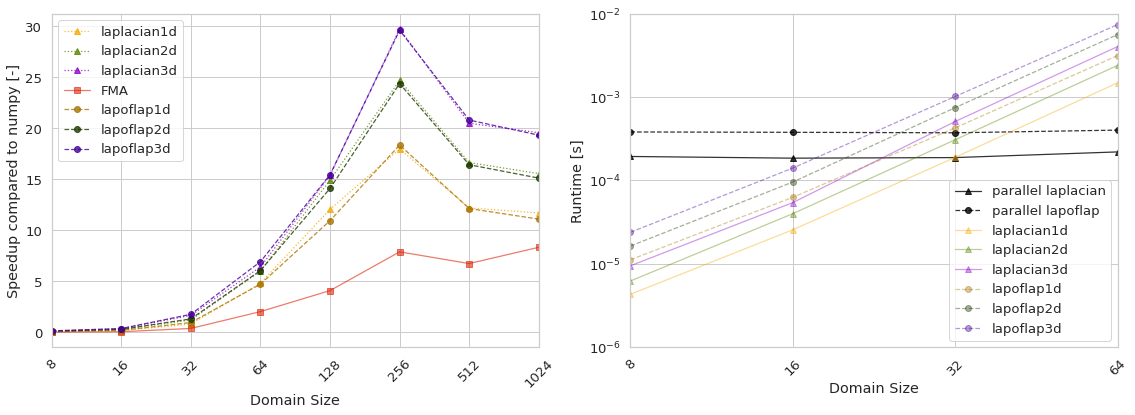

In [9]:


h = plt.figure(figsize=(16, 6))
gs = f.add_gridspec(1, 2)

with sns.axes_style("whitegrid"):
        sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.25})
        ax = h.add_subplot(gs[0, 0])

        #speedup of one stencil compared
        backend = "numba_stencil"
    
        #plt.figure(figsize=(10,6))
        #plt.title("{} parallel: Stencil comparison".format(backend))
        #xs=[0,1,2,3,4,5,6]
        plt.xticks(xs,(8,16,32,64,128,256,512,1024))
        plt.xticks(rotation=45)
        plt.xlim((0,7))
        for stencil in stencil_name_list:
            df_numpy = df[((df.stencil_name==stencil)&(df.backend=="numpy"))]
            df_plot=df[((df.numba_parallel==True)& (df.stencil_name==stencil) & (df.backend==backend))]  
            if stencil in ("laplacian1d,laplacian2d,laplacian3d"):
                plt.plot(xs,df_numpy["run_avg"]/df_plot["run_avg"].values,"^:",label="{}".format(stencil),alpha=0.8,color=df_color[stencil][0])

            elif (stencil == "FMA"):
                 plt.plot(xs,df_numpy["run_avg"]/df_plot["run_avg"].values,"s-",label="{}".format(stencil),alpha=0.6,color=df_color[stencil][0])

            else:
                plt.plot(xs,df_numpy["run_avg"]/df_plot["run_avg"].values,"o--",label="{}".format(stencil),alpha=0.8,color=df_color[stencil][0])

        plt.legend()
        plt.ylabel('Speedup compared to numpy [-]')
        plt.xlabel('Domain Size')

        plt.tight_layout()

        plt.savefig('numba2.png',dpi=300)

with sns.axes_style("whitegrid"):
        sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.25})
        ax = h.add_subplot(gs[0, 1])

        #speedup of one stencil compared
        backend = "numba_vector_function"
    
        #plt.figure(figsize=(10,6))
        #plt.title("{} parallel: Stencil comparison".format(backend))
        #xs=[0,1,2,3,4,5,6]
        plt.xticks(xs,(8,16,32,64,128,256,512,1024))
        plt.xticks(rotation=45)
        plt.xlim((0,3))
        plt.ylim((1e-6,1e-2))
        plt.yscale("log")
        for stencil in stencil_name_list:
            df_numpy = df[((df.stencil_name==stencil)&(df.backend=="numpy"))]
            df_plot=df[((df.numba_parallel==True)& (df.stencil_name==stencil) & (df.backend==backend))]  
            if stencil in ("laplacian2d"):
                plt.plot(xs,df_plot["run_avg"],"^-",label="parallel laplacian",alpha=0.8,color="black")

            #elif (stencil == "FMA"):
            #     plt.plot(xs,df_plot["run_avg"],"s-",label="{}".format(stencil),alpha=0.6,color=df_color[stencil][0])

            elif stencil in ("lapoflap2d"):
                plt.plot(xs,df_plot["run_avg"],"o--",label="parallel lapoflap",alpha=0.8,color="black")

        for stencil in stencil_name_list:
            df_numpy = df[((df.stencil_name==stencil)&(df.backend=="numpy"))]
            df_plot=df[((df.numba_parallel==False)& (df.stencil_name==stencil) & (df.backend==backend))]  
            if stencil in ("laplacian1d,laplacian2d,laplacian3d"):
                plt.plot(xs,df_plot["run_avg"],"^-",label="{}".format(stencil),alpha=0.4,color=df_color[stencil][0])

            #elif (stencil == "FMA"):
             #    plt.plot(xs,df_plot["run_avg"],"s-",label="{}".format(stencil),alpha=0.4,color=df_color[stencil][0])

            elif stencil in ("lapoflap1d,lapoflap2d,lapoflap3d"):
                plt.plot(xs,df_plot["run_avg"],"o--",label="{}".format(stencil),alpha=0.4,color=df_color[stencil][0])
                
                
        
        plt.legend()
        plt.ylabel('Runtime [s]')
        plt.xlabel('Domain Size')

        plt.tight_layout()
        plt.savefig('numba2.png',dpi=300)


In [11]:
#save fastest stencil in separate df

df1=df[((df.backend=="numba_stencil"))] 
df1

,stencil_name,backend,numba_parallel,numba_cudadevice,gt4py_backend,nx,ny,nz,num_iter,time_total,run_avg,run_stdev,run_first10,run_last10
4,test,numba_stencil,False,False,numpy,8,8,8,21,0.000015,7.629395e-07,1.430511e-07,7.867813e-07,7.390976e-07
7,test,numba_stencil,True,False,numpy,8,8,8,21,0.000016,7.867813e-07,1.327458e-07,8.106232e-07,7.629395e-07
14,laplacian1d,numba_stencil,False,False,numpy,8,8,8,21,0.000038,1.907349e-06,1.994753e-07,1.931190e-06,1.883507e-06
17,laplacian1d,numba_stencil,True,False,numpy,8,8,8,21,0.003794,1.897216e-04,3.435938e-06,1.895666e-04,1.887321e-04
24,laplacian2d,numba_stencil,False,False,numpy,8,8,8,21,0.000049,2.443790e-06,1.664667e-07,2.527237e-06,2.360344e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,lapoflap1d,numba_stencil,True,False,numpy,1024,1024,1024,21,30.597903,1.529895e+00,1.465728e-02,1.529280e+00,1.530477e+00
605,lapoflap2d,numba_stencil,False,False,numpy,1024,1024,1024,21,118.378321,5.918916e+00,1.303807e-02,5.921053e+00,5.916651e+00
607,lapoflap2d,numba_stencil,True,False,numpy,1024,1024,1024,21,30.692584,1.534629e+00,1.029963e-02,1.536336e+00,1.531557e+00
613,lapoflap3d,numba_stencil,False,False,numpy,1024,1024,1024,21,160.156683,8.007834e+00,1.037811e-02,8.005506e+00,8.008796e+00


In [13]:
df1.to_pickle('eval/numba_stencil.pkl')